In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white", context='poster')
sns.set(rc={'figure.figsize':(15,8)})
import math

In [2]:
%load_ext autoreload
%autoreload 2


In [3]:
plot_width  = int(900)
plot_height  = plot_width

#plot_height = int(plot_width*7.0/12)

In [4]:
plot_width  = int(900)
plot_height  = plot_width

#plot_height = int(plot_width*7.0/12)
#background = "black"
background=None

from functools import partial
from datashader.utils import export_image
from datashader.colors import colormap_select, Greys9

export = partial(export_image, background = background, export_path="export")
cm = partial(colormap_select, reverse=(background!="black"))

In [5]:
import sys
sys.path.append('..')
from model_equations_separate_NC_store_numba import *


In [6]:
morder = ['MIXOTROPH', 'OVERFLOW', 'EXOENZYME',  'ROS',]
media_order = ['lowN', 'pro99']
mpalette = [ '#426b69', '#9b7874', '#b191ff', '#84dcc6',]# '#d6d4a0',]
sns.color_palette(mpalette)

[(0.25882352941176473, 0.4196078431372549, 0.4117647058823529),
 (0.6078431372549019, 0.47058823529411764, 0.4549019607843137),
 (0.6941176470588235, 0.5686274509803921, 1.0),
 (0.5176470588235295, 0.8627450980392157, 0.7764705882352941)]

In [7]:
morder1 = morder[:-1]
mpalette1 = mpalette[:-1]

In [8]:
gorder = [ 'Strong', 'Sustained', 'Inhibited', 'Weak', 'Neutral',   'Other']
gpalette = sns.color_palette('Set2', n_colors=4).as_hex() + ['black', 'lightgrey']
gpalette = ['#882255', '#CC6677', '#332288', 
             '#44AA99','#88CCEE',
            '#D0CFCA',  ]

sns.color_palette(gpalette)

[(0.5333333333333333, 0.13333333333333333, 0.3333333333333333),
 (0.8, 0.4, 0.4666666666666667),
 (0.2, 0.13333333333333333, 0.5333333333333333),
 (0.26666666666666666, 0.6666666666666666, 0.6),
 (0.5333333333333333, 0.8, 0.9333333333333333),
 (0.8156862745098039, 0.8117647058823529, 0.792156862745098)]

In [9]:
Mtriangle = [
    'E', '', '', '', '',
    'EO', 'O', '', '', '',
    'ER', 'OR', 'R', '', '',
    'EM',    'OM', 'RM', 'M', '', 
    'ORM', 'ERM', 'EOM',   'EOR',  'EORM', ]

In [10]:

HCOLOR = '#ffc58f'
HCOLOR_light = '#ffd2a9'
PCOLOR = '#99cc99'
PCOLOR_light = '#aad5aa'

DONCOLOR = '#7285b7'
RDONCOLOR = 'black' #'#00334D'
DINCOLOR = '#bbdaff' #'#000066'

DOCCOLOR = '#cc6666'
RDOCCOLOR = 'black' #'#00334D'
DICCOLOR = '#ff9da4' #'#000066'

SHCOLOR = '#ffa98f'
SPCOLOR = '#326232'


ccnpalette = [PCOLOR, PCOLOR_light, HCOLOR, HCOLOR_light, SPCOLOR, SHCOLOR,DONCOLOR, RDONCOLOR, DINCOLOR]
ccnorder = ['Bp', 'Np', 'Bh','Nh',  'ABp', 'ABh', 'DON', 'RDON', 'DIN', ]
cccpalette = [PCOLOR, PCOLOR_light, HCOLOR, HCOLOR_light, SPCOLOR, SHCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR]
cccorder = ['Bp[C]', 'Cp', 'Bh[C]', 'Ch', 'ABp[C]', 'ABh[C]', 'DOC', 'RDOC', 'DIC']
ccxpalette = [PCOLOR, HCOLOR]
ccxorder = ['Xp', 'Xh']
hnpalette = [ HCOLOR_light, SPCOLOR, SHCOLOR, DONCOLOR, RDONCOLOR, DINCOLOR]
hnorder = [ 'Bh', 'ABp', 'ABh', 'DON', 'RDON', 'DIN']
hcpalette = [ HCOLOR_light, SPCOLOR, SHCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR]
hcorder = [ 'Bh[C]', 'ABp[C]', 'ABh[C]', 'DOC', 'RDOC', 'DIC']
pnpalette = [ PCOLOR_light, SPCOLOR, SHCOLOR, DONCOLOR, RDONCOLOR, DINCOLOR]
pnorder = [ 'Bp', 'ABp', 'ABh', 'DON', 'RDON', 'DIN']
pcpalette = [ PCOLOR_light, SPCOLOR, SHCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR]
pcorder = [ 'Bp[C]', 'ABp[C]', 'ABh[C]', 'DOC', 'RDOC', 'DIC']
sns.color_palette(ccnpalette + cccpalette, )
# 


[(0.6, 0.8, 0.6),
 (0.6666666666666666, 0.8352941176470589, 0.6666666666666666),
 (1.0, 0.7725490196078432, 0.5607843137254902),
 (1.0, 0.8235294117647058, 0.6627450980392157),
 (0.19607843137254902, 0.3843137254901961, 0.19607843137254902),
 (1.0, 0.6627450980392157, 0.5607843137254902),
 (0.4470588235294118, 0.5215686274509804, 0.7176470588235294),
 (0.0, 0.0, 0.0),
 (0.7333333333333333, 0.8549019607843137, 1.0),
 (0.6, 0.8, 0.6),
 (0.6666666666666666, 0.8352941176470589, 0.6666666666666666),
 (1.0, 0.7725490196078432, 0.5607843137254902),
 (1.0, 0.8235294117647058, 0.6627450980392157),
 (0.19607843137254902, 0.3843137254901961, 0.19607843137254902),
 (1.0, 0.6627450980392157, 0.5607843137254902),
 (0.8, 0.4, 0.4),
 (0.0, 0.0, 0.0),
 (1.0, 0.615686274509804, 0.6431372549019608)]

In [11]:
ccnorder = ['Bp', 'Np','Bh',  'Nh', 'DIN','DON',  'RDON', ]
ccnpalette = [PCOLOR, PCOLOR_light, HCOLOR, HCOLOR_light,DINCOLOR, DONCOLOR, RDONCOLOR, ]

#Hex Codes: #262842, #293961, #2C497F, #8897BD, #E3E4FA
#Hex Codes: #49593C, #945C39, #DF5F35, #EF9E84, #FFE3D1
#Hex Codes: #5E1525, #C74F29, #E99E46, #B6C38D, #828144
ccnpalette = ['#2F6755', '#98A69A', '#7d5c54', '#E7BB96', '#262842', '#2C497F', '#8897BD']
#ccnpalette = ['#828144', '#B6C38D', '#E99E46', '#E7BB96', '#262842', '#2C497F', '#8897BD']
cccorder = ['Bp[C]', 'Cp','Bh[C]',  'Ch', 'DIC','DOC',  'RDOC', ]
cccpalette = [PCOLOR, PCOLOR_light, HCOLOR, HCOLOR_light,DICCOLOR, DOCCOLOR, RDOCCOLOR, ]
#Hex Codes: #49593C, #945C39, #DF5F35, #EF9E84, #FFE3D1
cccpalette = ['#2F6755', '#98A69A', '#7d5c54', '#E7BB96', '#DF5F35', '#EF9E84', '#ffd8d1']

sns.color_palette(cccpalette)

[(0.1843137254901961, 0.403921568627451, 0.3333333333333333),
 (0.596078431372549, 0.6509803921568628, 0.6039215686274509),
 (0.49019607843137253, 0.3607843137254902, 0.32941176470588235),
 (0.9058823529411765, 0.7333333333333333, 0.5882352941176471),
 (0.8745098039215686, 0.37254901960784315, 0.20784313725490197),
 (0.9372549019607843, 0.6196078431372549, 0.5176470588235295),
 (1.0, 0.8470588235294118, 0.8196078431372549)]

In [12]:

 
sns.color_palette([PCOLOR, HCOLOR, PCOLOR_light, HCOLOR_light] )


[(0.6, 0.8, 0.6),
 (1.0, 0.7725490196078432, 0.5607843137254902),
 (0.6666666666666666, 0.8352941176470589, 0.6666666666666666),
 (1.0, 0.8235294117647058, 0.6627450980392157)]

In [13]:
refdf = pd.read_excel('../ML_model/reference_final.xlsx')

In [14]:
dpath = '../results/final/het/topruns'

In [15]:
sim_df = pd.concat([pd.read_csv(os.path.join(dpath, fname)) for fname in os.listdir(dpath)], ignore_index=True)

/tmp/ipykernel_3668770/3068646880.py:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  sim_df = pd.concat([pd.read_csv(os.path.join(dpath, fname)) for fname in os.listdir(dpath)], ignore_index=True)


In [16]:
minmse_df = pd.read_csv('../results/final/het/top_predicted_classes.csv.gz')

In [17]:
minmse_df.columns

Index(['run_id', 'y_pred', 'max_prob', 'idx', 'media', 'which', 'model',
       'hash', 'VPRO', 'Sample', 'full name', 'Group', 'RMSE_Bptotal[N]',
       'RMSE_Bptotal[C]', 'compare_points', 'RMSE', 'RMSE_filled', 'Phase',
       'Unnamed: 0', 'Versatile', 'MODEL', 'EXOENZYME', 'OVERFLOW', 'ROS',
       'MIXOTROPH'],
      dtype='object')

In [18]:
minmse_df_single = minmse_df.groupby(['y_pred', 'MODEL',]).apply(lambda x : x.nsmallest(1, 'RMSE')).reset_index(drop=True)

In [19]:
df = pd.merge(minmse_df_single, sim_df, on='run_id', how='left')

In [20]:
df = pd.merge(minmse_df, sim_df, on='run_id', how='left')

In [21]:
[c for c in df.columns if c.endswith('_y')]

['ROS_y', 'Unnamed: 0_y']

In [22]:
df.columns

Index(['run_id', 'y_pred', 'max_prob', 'idx', 'media', 'which', 'model',
       'hash', 'VPRO', 'Sample', 'full name', 'Group', 'RMSE_Bptotal[N]',
       'RMSE_Bptotal[C]', 'compare_points', 'RMSE', 'RMSE_filled', 'Phase',
       'Unnamed: 0_x', 'Versatile', 'MODEL', 'EXOENZYME', 'OVERFLOW', 'ROS_x',
       'MIXOTROPH', 'Bp', 'Np', 'Cp', 'Bh', 'Nh', 'Ch', 'DON', 'RDON', 'DIN',
       'DOC', 'RDOC', 'DIC', 'ROS_y', 't', 'day', 'gross_uptakeINp',
       'gross_uptakeINh', 'gross_uptakeONp', 'gross_uptakeONh',
       'gross_uptakeICp', 'gross_uptakeICh', 'gross_uptakeOCp',
       'gross_uptakeOCh', 'uptakeNp', 'uptakeNh', 'uptakeCp', 'uptakeCh',
       'QCp', 'QCh', 'biosynthesisNp', 'biosynthesisNh', 'respirationCp',
       'respirationCh', 'biomass_breakdownCp', 'biomass_breakdownCh',
       'overflowNp', 'overflowNh', 'overflowCp', 'overflowCh',
       'ROSproductionp', 'ROSproductionh', 'ROSlossp', 'ROSlossh',
       'deathbiomassNp', 'deathbiomassNh', 'deathstoreNp', 'deathstoreNh',


In [23]:
df = df.reset_index(drop=True)

In [24]:
minmse_df[['MODEL', 'y_pred']].value_counts()

MODEL  y_pred   
RM     Weak         5
       Sustained    5
E      Neutral      5
       Other        5
RM     Strong       5
                   ..
EM     Strong       1
EO     Inhibited    1
EORM   Inhibited    1
EOM    Strong       1
E      Strong       1
Name: count, Length: 87, dtype: int64

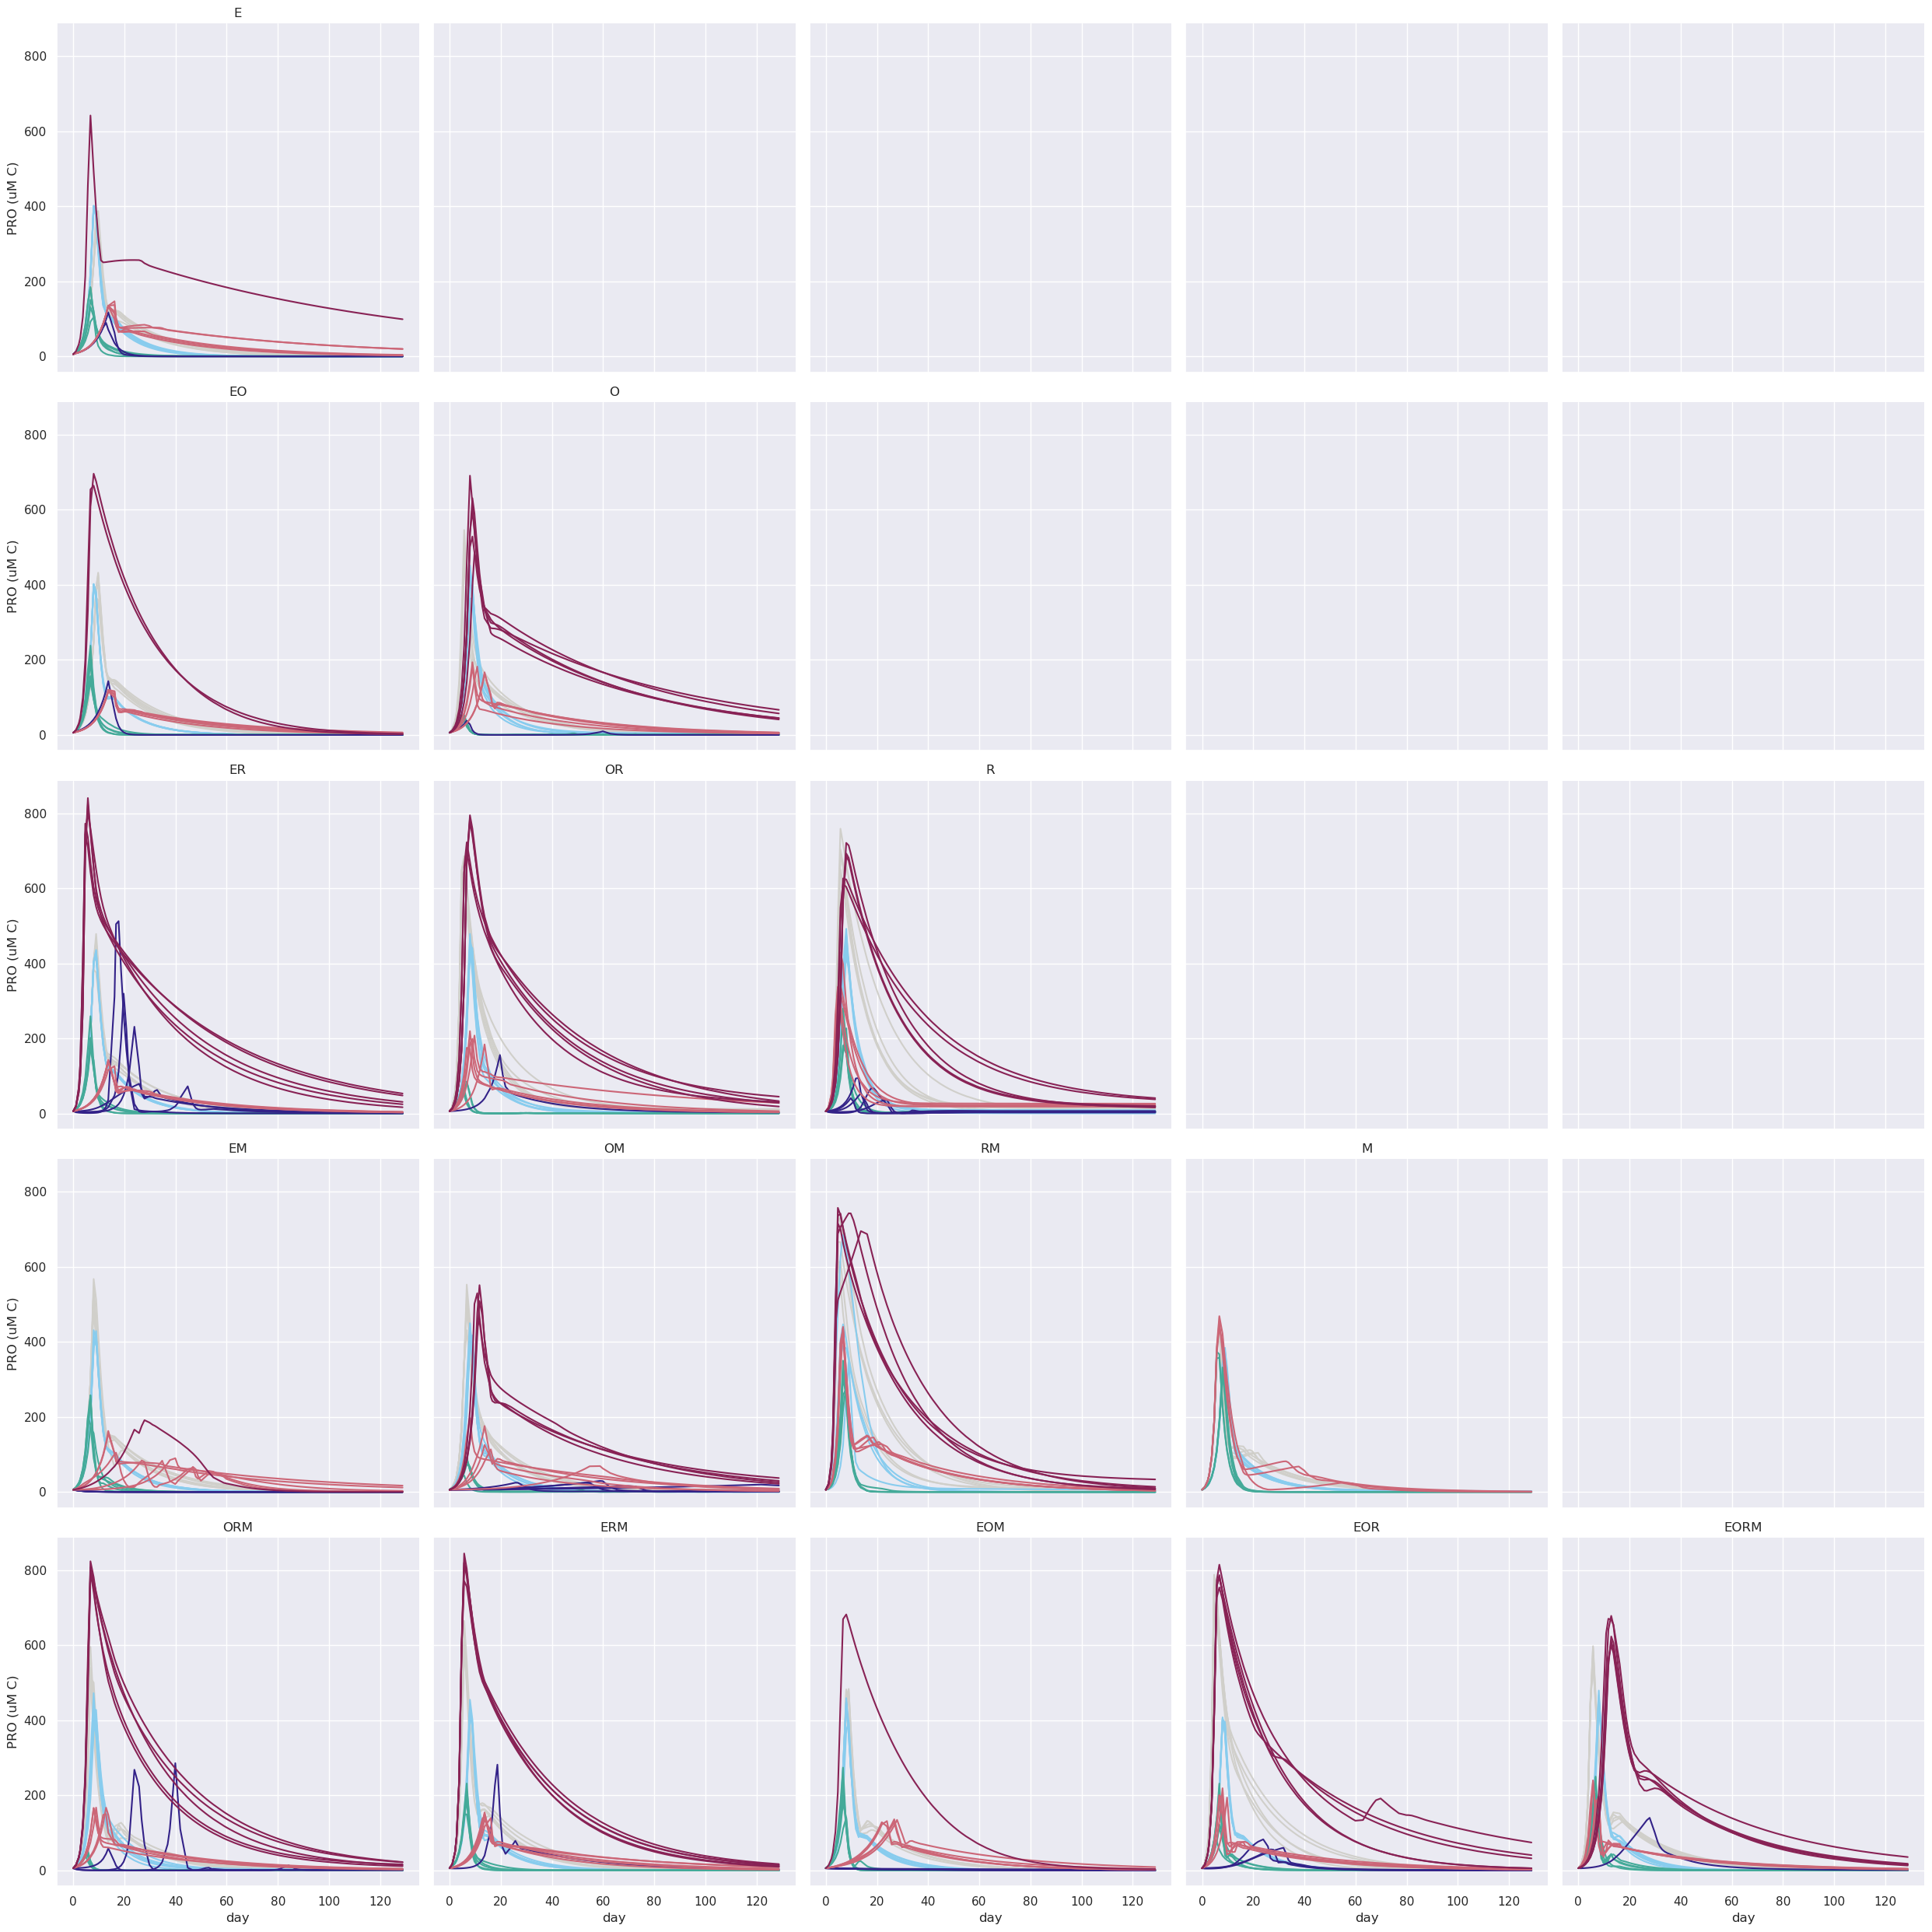

In [25]:
#runids = min_mse_df.loc[min_mse_df.Mode.isin(['Monte']),'run_id'].sample(500, ignore_index=True)
g = sns.relplot(
    data=df,
    x='day',
    y='Bptotal[C]',
    hue='y_pred', hue_order=reversed(gorder),
    kind='line', #lw=1,
    estimator=None, units='run_id', palette=reversed(gpalette),
    col='MODEL', col_wrap=5, col_order=Mtriangle, #col_wrap=3,
    legend=False,
        #aspect=1, height=3,
    #facet_kws=dict(margin_titles=True)

).set_titles(row_template='{row_name}', col_template='{col_name}').set(ylabel='', )
g.set(ylabel='PRO (uM C)')
#plt.suptitle('Montecarlo')
#plt.subplots_adjust(hspace=0.1, wspace=0.1)
#g.set(ylim=(0, 1000))

#g.set(yscale='log', ylim=(1e-1, 1500))
plt.show()

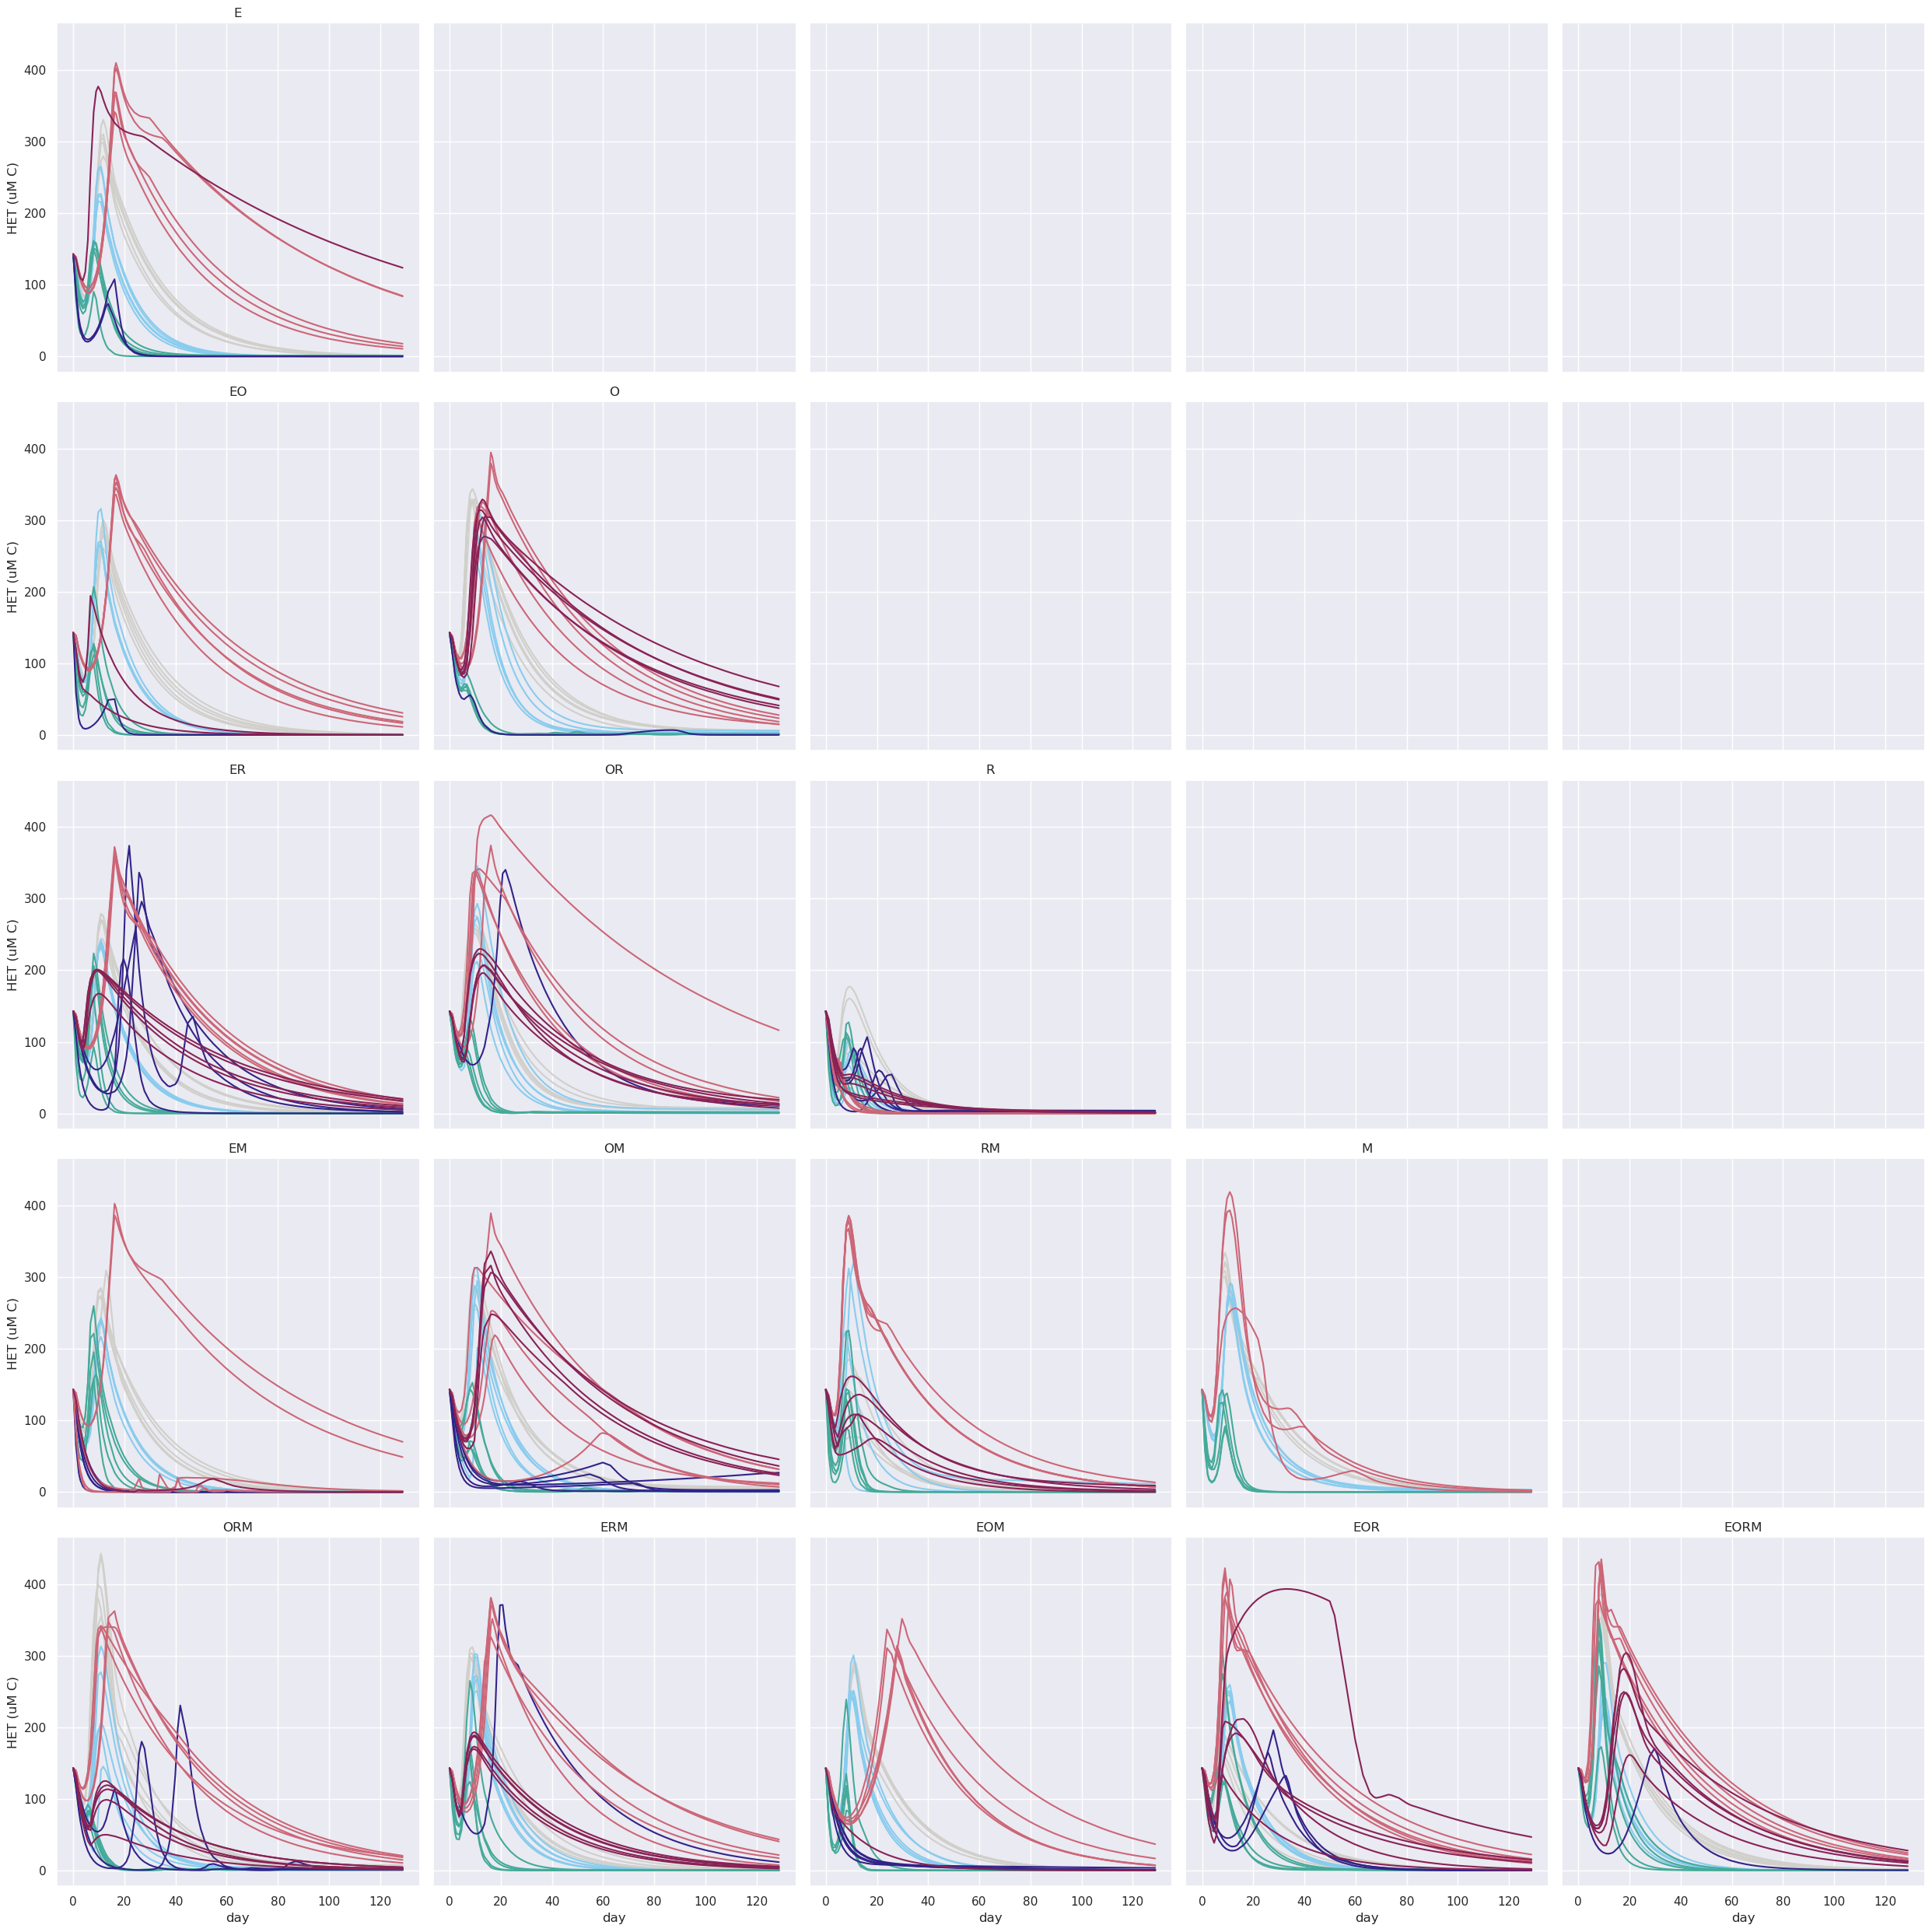

In [26]:
#runids = min_mse_df.loc[min_mse_df.Mode.isin(['Monte']),'run_id'].sample(500, ignore_index=True)
g = sns.relplot(
    data=df,
    x='day',
    y='Bhtotal[C]',
    hue='y_pred', hue_order=reversed(gorder),
    kind='line', #lw=1,
    estimator=None, units='run_id', palette=reversed(gpalette),
    col='MODEL', col_wrap=5, col_order=Mtriangle, #col_wrap=3,
    legend=False,
        #aspect=1, height=3,
    #facet_kws=dict(margin_titles=True)

).set_titles(row_template='{row_name}', col_template='{col_name}').set(ylabel='', )
g.set(ylabel='HET (uM C)')
#plt.suptitle('Montecarlo')
#plt.subplots_adjust(hspace=0.1, wspace=0.1)
#g.set(ylim=(0, 1000))

#g.set(yscale='log', ylim=(1e-1, 1500))
plt.show()

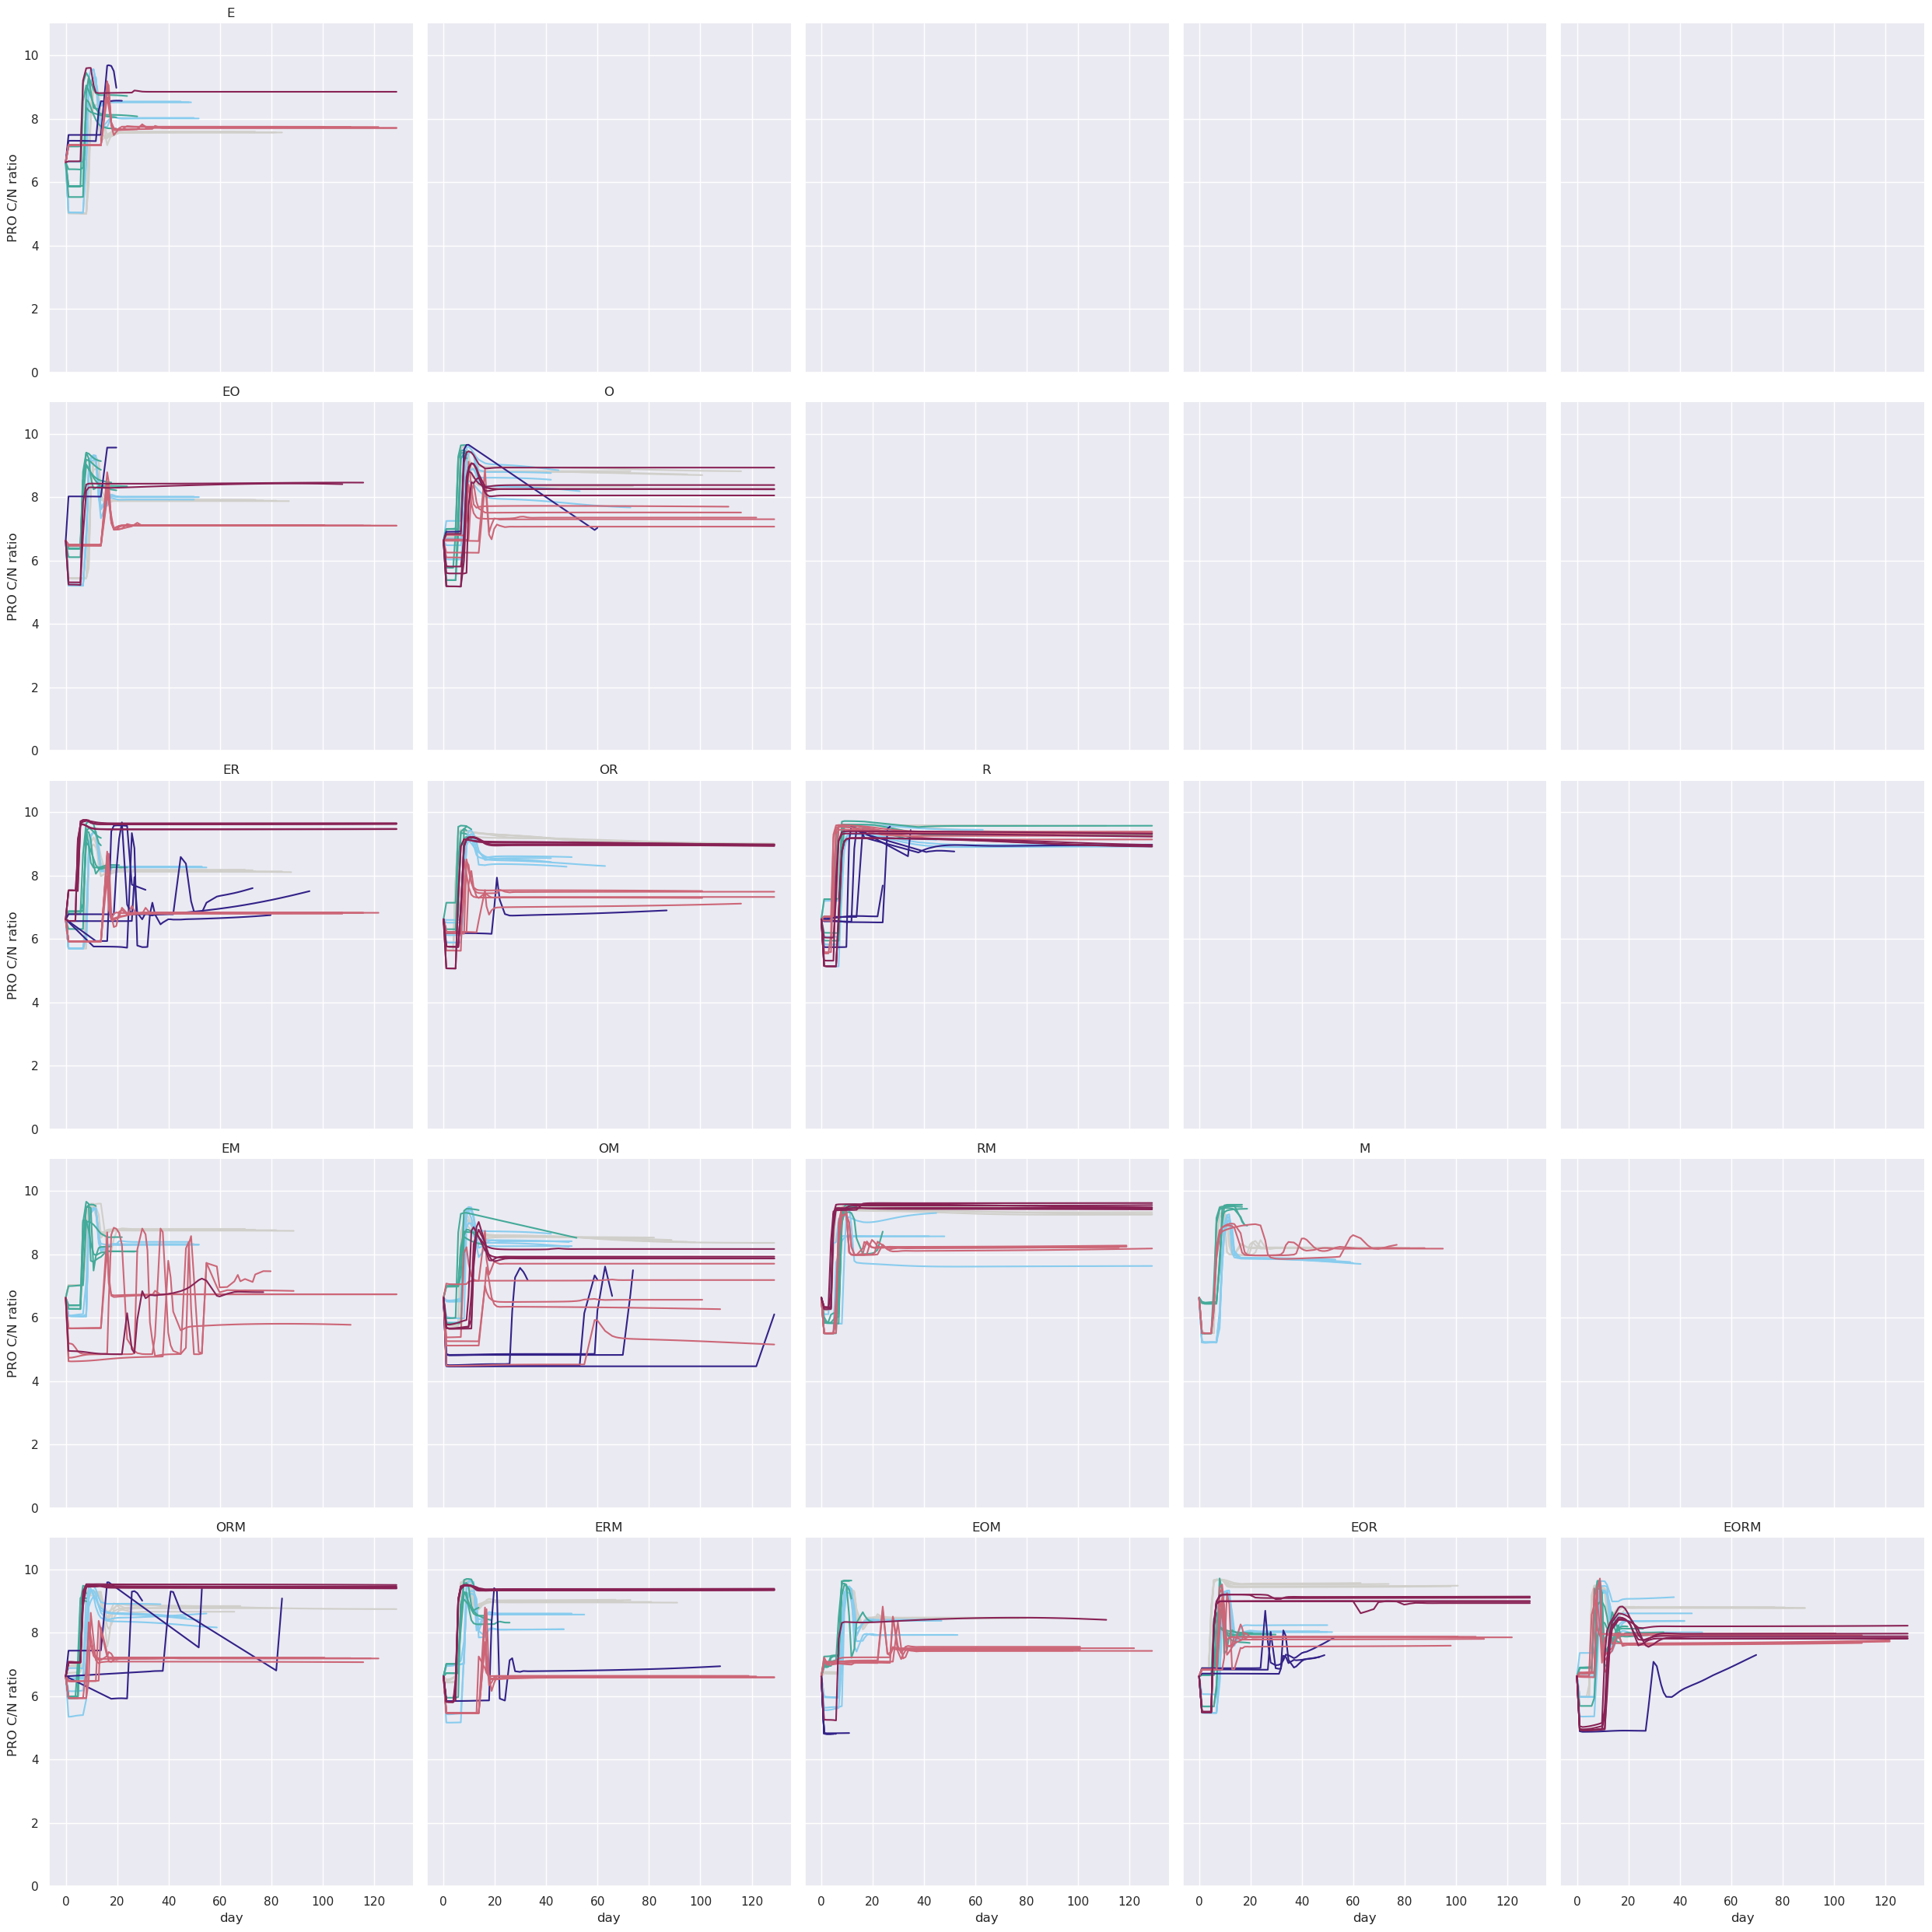

In [27]:
#runids = min_mse_df.loc[min_mse_df.Mode.isin(['Monte']),'run_id'].sample(500, ignore_index=True)
g = sns.relplot(
    data=df.loc[df['Bptotal[C]'].ge(5)],
    x='day',
    y='QCp',
    hue='y_pred', hue_order=reversed(gorder),
    kind='line', #lw=0.4,
    estimator=None, units='run_id', palette=reversed(gpalette),
    col='MODEL', col_wrap=5, col_order=Mtriangle, #col_wrap=3,
    legend=False,
        #aspect=1, height=3,
    #facet_kws=dict(margin_titles=True)

).set_titles(row_template='{row_name}', col_template='{col_name}').set(ylabel='', )
g.set(ylabel='PRO C/N ratio')
#plt.suptitle('Montecarlo')
#plt.subplots_adjust(hspace=0.1, wspace=0.1)
g.set(ylim=(0, 11))

#g.set(yscale='log', ylim=(1e-1, 1500))
plt.show()

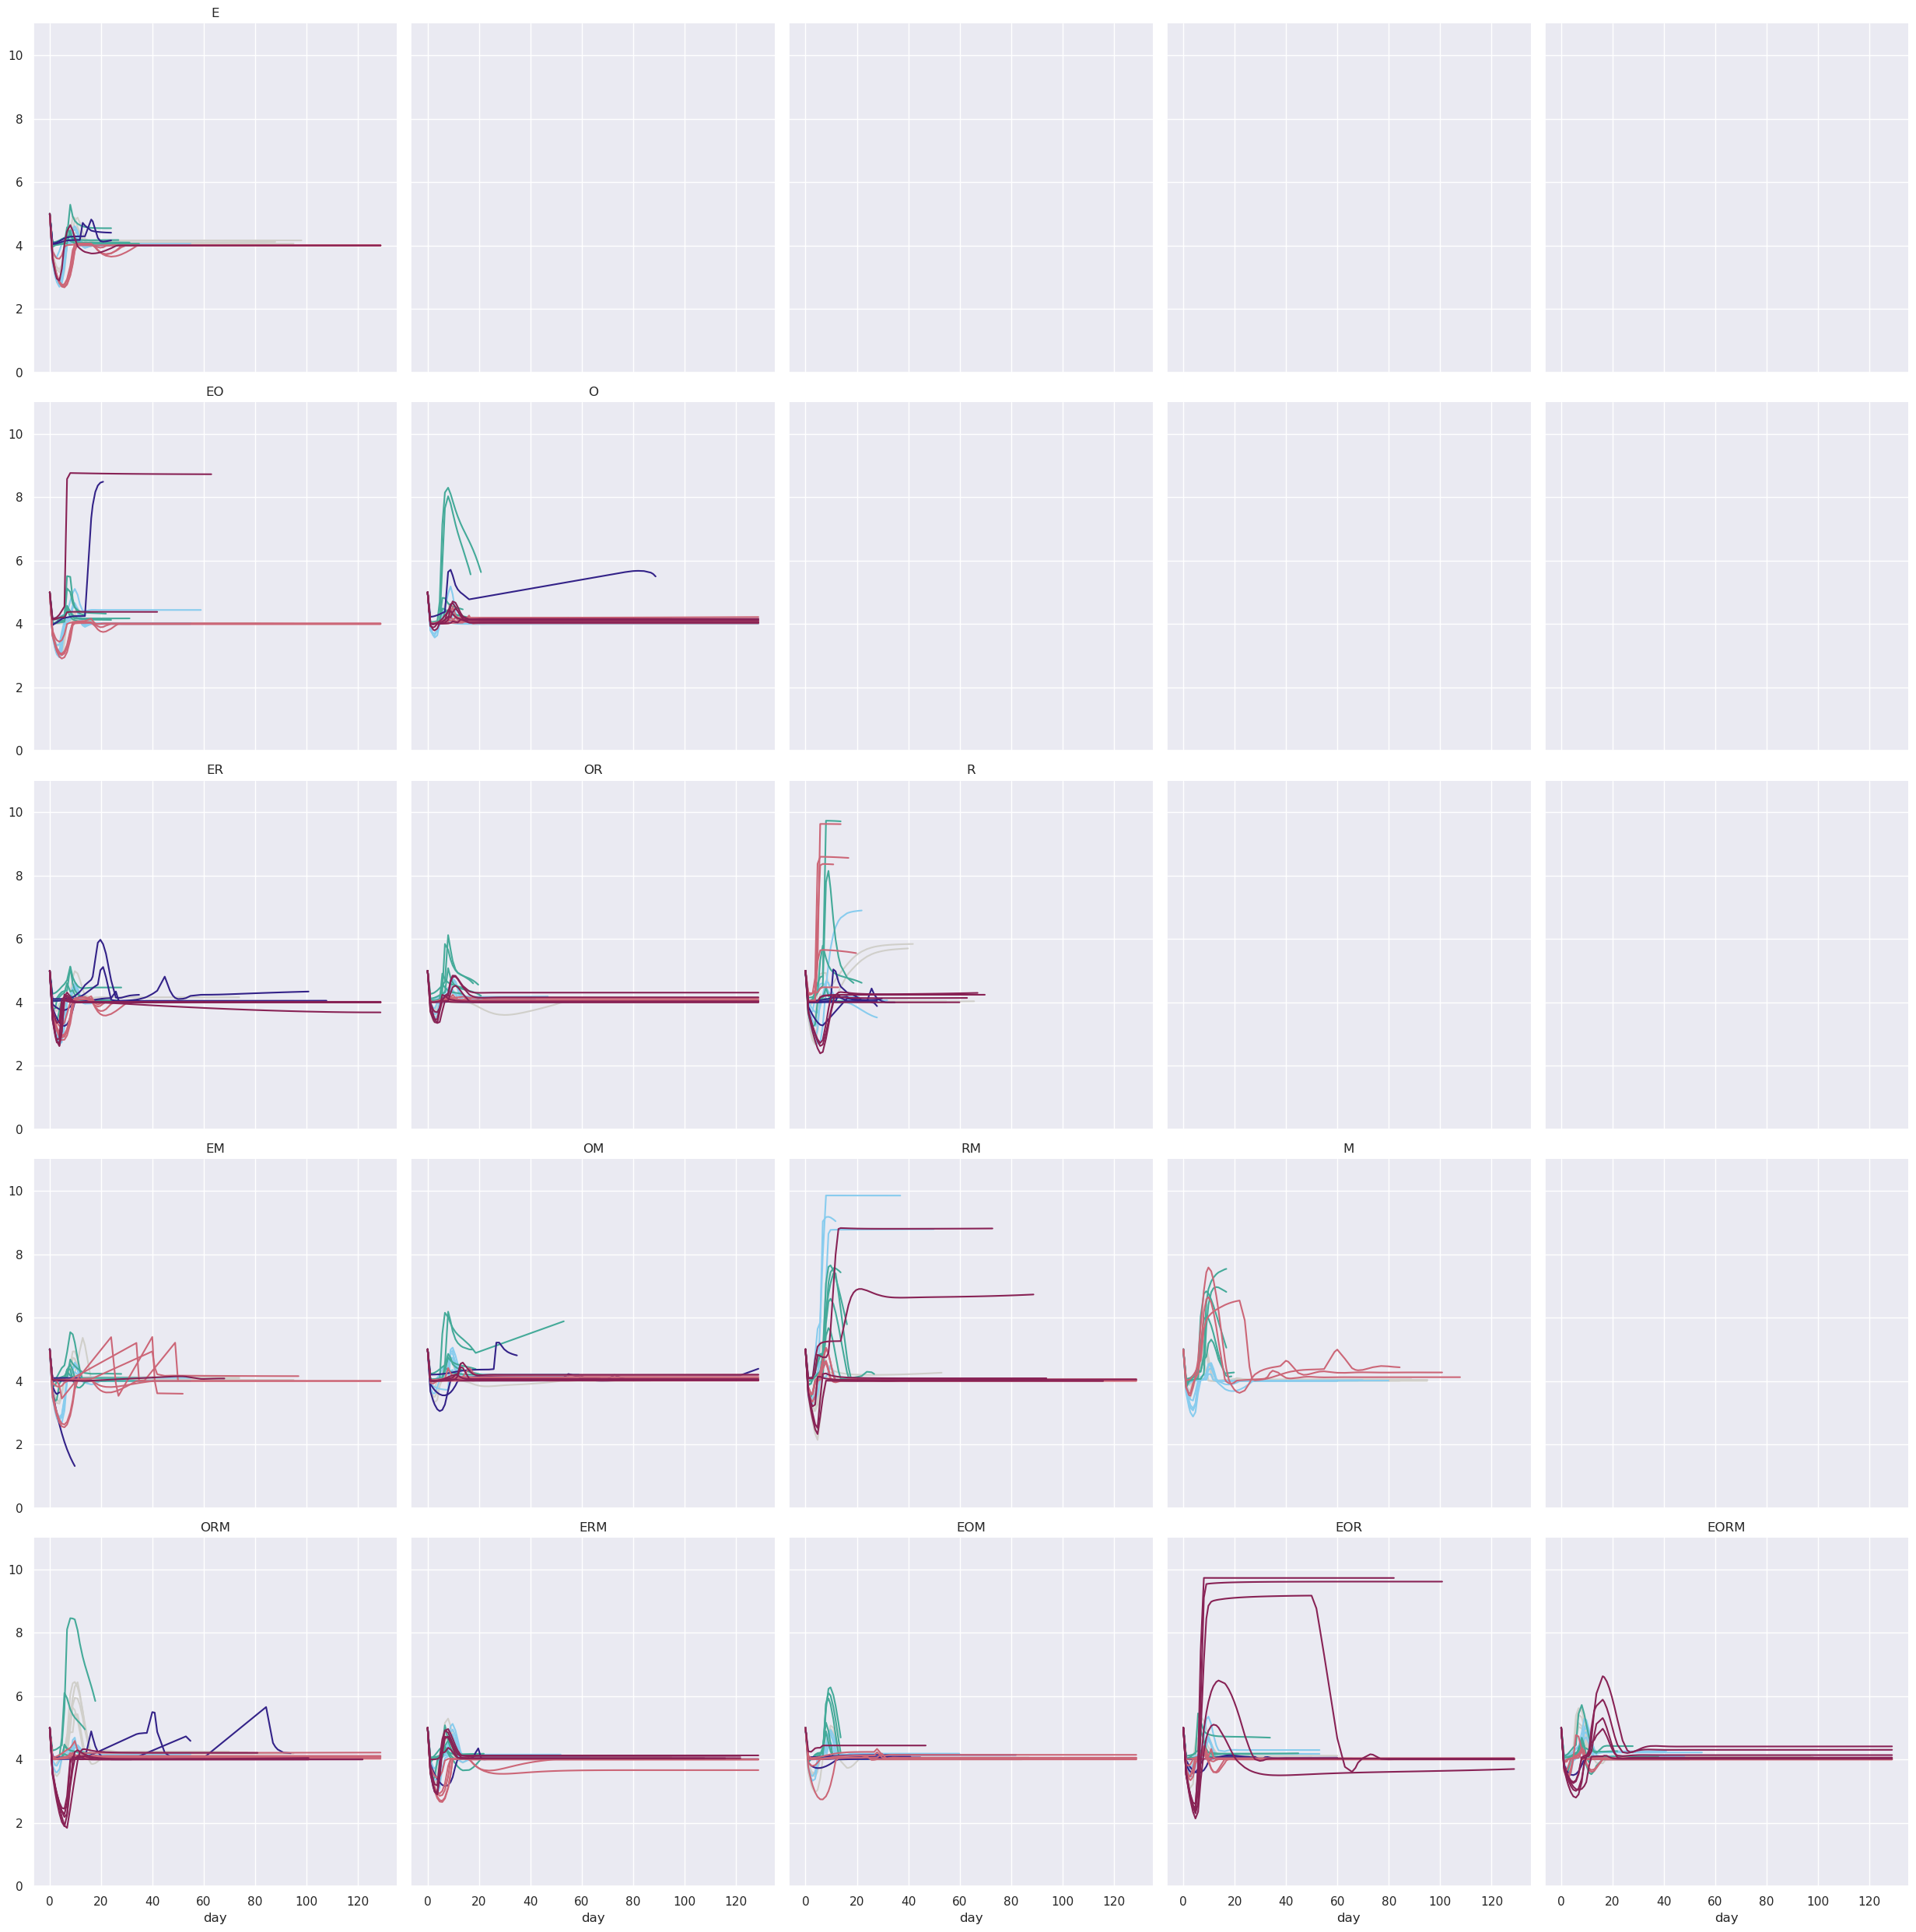

In [28]:
#runids = min_mse_df.loc[min_mse_df.Mode.isin(['Monte']),'run_id'].sample(500, ignore_index=True)
g = sns.relplot(
    data=df.loc[df['Bhtotal[C]'].ge(5)],
    x='day',
    y='QCh',
    hue='y_pred', hue_order=reversed(gorder),
    kind='line', #lw=1,
    estimator=None, units='run_id', palette=reversed(gpalette),
    col='MODEL', col_wrap=5, col_order=Mtriangle, #col_wrap=3,
    legend=False,
        #aspect=1, height=3,
    #facet_kws=dict(margin_titles=True)

).set_titles(row_template='{row_name}', col_template='{col_name}').set(ylabel='', )
#g.set(ylabel='umol C/L')
#plt.suptitle('Montecarlo')
#plt.subplots_adjust(hspace=0.1, wspace=0.1)
#g.set(ylim=(0, 20))
g.set(ylim=(0, 11))

#g.set(yscale='log', ylim=(1e-1, 1500))
plt.show()

In [29]:
gorder_a = ['Strong', 'Sustained', 'Inhibited', 'Weak', ]


In [30]:
refdf

train_Group Sample  id        full name   Group Experiment         day  \
0         Axenic    1A0   1           Axenic  Axenic       10CC    0.000000   
1         Axenic    1A0   1           Axenic  Axenic       10CC    1.081944   
2         Axenic    1A0   1           Axenic  Axenic       10CC    2.164583   
3         Axenic    1A0   1           Axenic  Axenic       10CC    2.747222   
4         Axenic    1A0   1           Axenic  Axenic       10CC    3.754167   
...          ...    ...  ..              ...     ...        ...         ...   
2881        Weak   11C0  11  Roseovarius 5C3    Weak       10CC  110.943750   
2882        Weak   11C0  11  Roseovarius 5C3    Weak       10CC  115.845833   
2883        Weak   11C0  11  Roseovarius 5C3    Weak       10CC  118.788889   
2884        Weak   11C0  11  Roseovarius 5C3    Weak       10CC  121.777778   
2885        Weak   11C0  11  Roseovarius 5C3    Weak       10CC  128.767361   

      ref_Bp[N]  ref_Bp[C]           t  
0      2.860934  18.953691         0.0  
1      0.797310   5.282176     93480.0  
2      3.728595  24.701941    187020.0  
3      5.323214  35.266293    237360.0  
4      7.175786  47.539584    324360.0  
...         ...        ...         ...  
2881   0.117251   0.776791   9585540.0  
2882   0.445555   2.951804  10009080.0  
2883   0.891111   5.903609  10263360.0  
2884   1.055263   6.991115  10521600.0  
2885   1.336666   8.855413  11125500.0  

[2886 rows x 10 columns]

In [31]:
refdf['full name_'] = refdf['full name'].str.replace(r' ([^ ]+)$', r'\n\1', regex=True)
refdf['Group_'] = pd.Categorical(refdf['Group'], categories=gorder, ordered=True )
reforder = refdf.loc[
    ~refdf.Group.isin(['Axenic']) &
    ((~refdf.Experiment.isin(['5x5'])) | refdf.id.isin(['MED4_1A3']))
].drop_duplicates('full name_').sort_values(by='Group_')['full name_']

In [32]:
refdf.id.unique()

array([1, 3, 4, 5, 'MED4_DE1', 'MED4_BS11', 'MED4_1A3', 'MED4_ATCC',
       'MED4_DE', 6, 7, 10, 11], dtype=object)

In [33]:
reforder

666     Pseudoalteromonas\nhaloplanktis
1332               A. macleodii\nHOT1A3
1998                 Ruegeria\npomeroyi
2220    Sulfitobacter\npseudonitzschiae
222        Marinobacter adhaerens\nHP15
444          Phaeobacter\ngallaeciensis
2442                     Marinovum\n5F3
2664                   Roseovarius\n5C3
Name: full name_, dtype: object

In [34]:
    
refdf['ref_Bp[C]_clip'] = refdf['ref_Bp[C]'].clip(6)

In [35]:
refdf.loc[refdf.Group.isin(['Strong'])]

train_Group   Sample       id                       full name   Group  \
666       Strong      5A0        5  Pseudoalteromonas haloplanktis  Strong   
667       Strong      5A0        5  Pseudoalteromonas haloplanktis  Strong   
668       Strong      5A0        5  Pseudoalteromonas haloplanktis  Strong   
669       Strong      5A0        5  Pseudoalteromonas haloplanktis  Strong   
670       Strong      5A0        5  Pseudoalteromonas haloplanktis  Strong   
...          ...      ...      ...                             ...     ...   
1993      Strong  5x5_6C0  MED4_DE           A. mediterranea AltDE  Strong   
1994      Strong  5x5_6C0  MED4_DE           A. mediterranea AltDE  Strong   
1995      Strong  5x5_6C0  MED4_DE           A. mediterranea AltDE  Strong   
1996      Strong  5x5_6C0  MED4_DE           A. mediterranea AltDE  Strong   
1997      Strong  5x5_6C0  MED4_DE           A. mediterranea AltDE  Strong   

     Experiment         day  ref_Bp[N]  ref_Bp[C]           t  \
666        10CC    0.000000   2.743683  18.176900         0.0   
667        10CC    1.081944   1.289766   8.544697     93480.0   
668        10CC    2.164583   2.626432  17.400109    187020.0   
669        10CC    2.747222   3.095437  20.507272    237360.0   
670        10CC    3.754167   5.651518  37.441307    324360.0   
...         ...         ...        ...        ...         ...   
1993        5x5  110.943750   5.261471  34.857244   9585540.0   
1994        5x5  115.845833   4.886027  32.369926  10009080.0   
1995        5x5  118.788889   5.778580  38.283094  10263360.0   
1996        5x5  121.777778   3.432235  22.738559  10521600.0   
1997        5x5  128.767361   2.092870  13.865262  11125500.0   

                           full name_  Group_  ref_Bp[C]_clip  
666   Pseudoalteromonas\nhaloplanktis  Strong       18.176900  
667   Pseudoalteromonas\nhaloplanktis  Strong        8.544697  
668   Pseudoalteromonas\nhaloplanktis  Strong       17.400109  
669   Pseudoalteromonas\nhaloplanktis  Strong       20.507272  
670   Pseudoalteromonas\nhaloplanktis  Strong       37.441307  
...                               ...     ...             ...  
1993           A. mediterranea\nAltDE  Strong       34.857244  
1994           A. mediterranea\nAltDE  Strong       32.369926  
1995           A. mediterranea\nAltDE  Strong       38.283094  
1996           A. mediterranea\nAltDE  Strong       22.738559  
1997           A. mediterranea\nAltDE  Strong       13.865262  

[1332 rows x 13 columns]

In [36]:
greenpalette = sns.light_palette(PCOLOR, n_colors=12 )[2:]
orangepalette = sns.light_palette(HCOLOR, n_colors=12 )[2:]


In [37]:
data=df.loc[
    df.y_pred.isin(['Strong']) &
    df.MODEL.isin(['E']) 
]
data# [['Sample', 'full name']].value_counts()


run_id  y_pred  max_prob  \
13764  monte_extend_EXOENZYME_292_monte_vpro_3_96_67_...  Strong  0.767017   
13765  monte_extend_EXOENZYME_292_monte_vpro_3_96_67_...  Strong  0.767017   
13766  monte_extend_EXOENZYME_292_monte_vpro_3_96_67_...  Strong  0.767017   
13767  monte_extend_EXOENZYME_292_monte_vpro_3_96_67_...  Strong  0.767017   
13768  monte_extend_EXOENZYME_292_monte_vpro_3_96_67_...  Strong  0.767017   
...                                                  ...     ...       ...   
13833  monte_extend_EXOENZYME_292_monte_vpro_3_96_67_...  Strong  0.767017   
13834  monte_extend_EXOENZYME_292_monte_vpro_3_96_67_...  Strong  0.767017   
13835  monte_extend_EXOENZYME_292_monte_vpro_3_96_67_...  Strong  0.767017   
13836  monte_extend_EXOENZYME_292_monte_vpro_3_96_67_...  Strong  0.767017   
13837  monte_extend_EXOENZYME_292_monte_vpro_3_96_67_...  Strong  0.767017   

                                                     idx media which  \
13764  monte_extend_EXOENZYME_292_monte_vpro_3_96_67_...  lowN   all   
13765  monte_extend_EXOENZYME_292_monte_vpro_3_96_67_...  lowN   all   
13766  monte_extend_EXOENZYME_292_monte_vpro_3_96_67_...  lowN   all   
13767  monte_extend_EXOENZYME_292_monte_vpro_3_96_67_...  lowN   all   
13768  monte_extend_EXOENZYME_292_monte_vpro_3_96_67_...  lowN   all   
...                                                  ...   ...   ...   
13833  monte_extend_EXOENZYME_292_monte_vpro_3_96_67_...  lowN   all   
13834  monte_extend_EXOENZYME_292_monte_vpro_3_96_67_...  lowN   all   
13835  monte_extend_EXOENZYME_292_monte_vpro_3_96_67_...  lowN   all   
13836  monte_extend_EXOENZYME_292_monte_vpro_3_96_67_...  lowN   all   
13837  monte_extend_EXOENZYME_292_monte_vpro_3_96_67_...  lowN   all   

           model                  hash  \
13764  EXOENZYME  h8519271514136708373   
13765  EXOENZYME  h8519271514136708373   
13766  EXOENZYME  h8519271514136708373   
13767  EXOENZYME  h8519271514136708373   
13768  EXOENZYME  h8519271514136708373   
...          ...                   ...   
13833  EXOENZYME  h8519271514136708373   
13834  EXOENZYME  h8519271514136708373   
13835  EXOENZYME  h8519271514136708373   
13836  EXOENZYME  h8519271514136708373   
13837  EXOENZYME  h8519271514136708373   

                                          VPRO Sample  ... deathC_DOCh  \
13764  vpro_3_96_67_EXOENZYME_C4__27_EXOENZYME    5A0  ...    0.000017   
13765  vpro_3_96_67_EXOENZYME_C4__27_EXOENZYME    5A0  ...    0.000016   
13766  vpro_3_96_67_EXOENZYME_C4__27_EXOENZYME    5A0  ...    0.000014   
13767  vpro_3_96_67_EXOENZYME_C4__27_EXOENZYME    5A0  ...    0.000013   
13768  vpro_3_96_67_EXOENZYME_C4__27_EXOENZYME    5A0  ...    0.000013   
...                                        ...    ...  ...         ...   
13833  vpro_3_96_67_EXOENZYME_C4__27_EXOENZYME    5A0  ...    0.000017   
13834  vpro_3_96_67_EXOENZYME_C4__27_EXOENZYME    5A0  ...    0.000016   
13835  vpro_3_96_67_EXOENZYME_C4__27_EXOENZYME    5A0  ...    0.000016   
13836  vpro_3_96_67_EXOENZYME_C4__27_EXOENZYME    5A0  ...    0.000016   
13837  vpro_3_96_67_EXOENZYME_C4__27_EXOENZYME    5A0  ...    0.000015   

      deathN_DONp  deathN_DONh      Bp[C]  Bptotal[N]  Bptotal[C]       Bh[C]  \
13764    0.000002     0.000003   5.915179    0.892857    5.915179  142.857143   
13765    0.000005     0.000004  10.664163    2.135203   14.210748  136.015415   
13766    0.000012     0.000004  23.952895    4.802366   31.961357  116.385706   
13767    0.000019     0.000004  37.044878    7.427181   49.430592  109.466109   
13768    0.000039     0.000004  78.700328   15.778208  105.010657  105.685812   
...           ...          ...        ...         ...         ...         ...   
13833    0.000033     0.000004  80.825359   13.149404  116.360031  145.320334   
13834    0.000031     0.000004  77.340474   12.582452  111.343045  139.054694   
13835    0.000031     0.000004  75.320864   12.253883  108.435530  135.423540   
13836    0.000030     0.000004  73.323772   

In [38]:
plt.rcParams['axes.titlesize']

12.0

In [39]:
sns.set_style('white')

In [43]:
df = pd.merge(minmse_df_single, sim_df, on='run_id', how='left')

In [48]:
gorder

['Strong', 'Sustained', 'Inhibited', 'Weak', 'Neutral', 'Other']

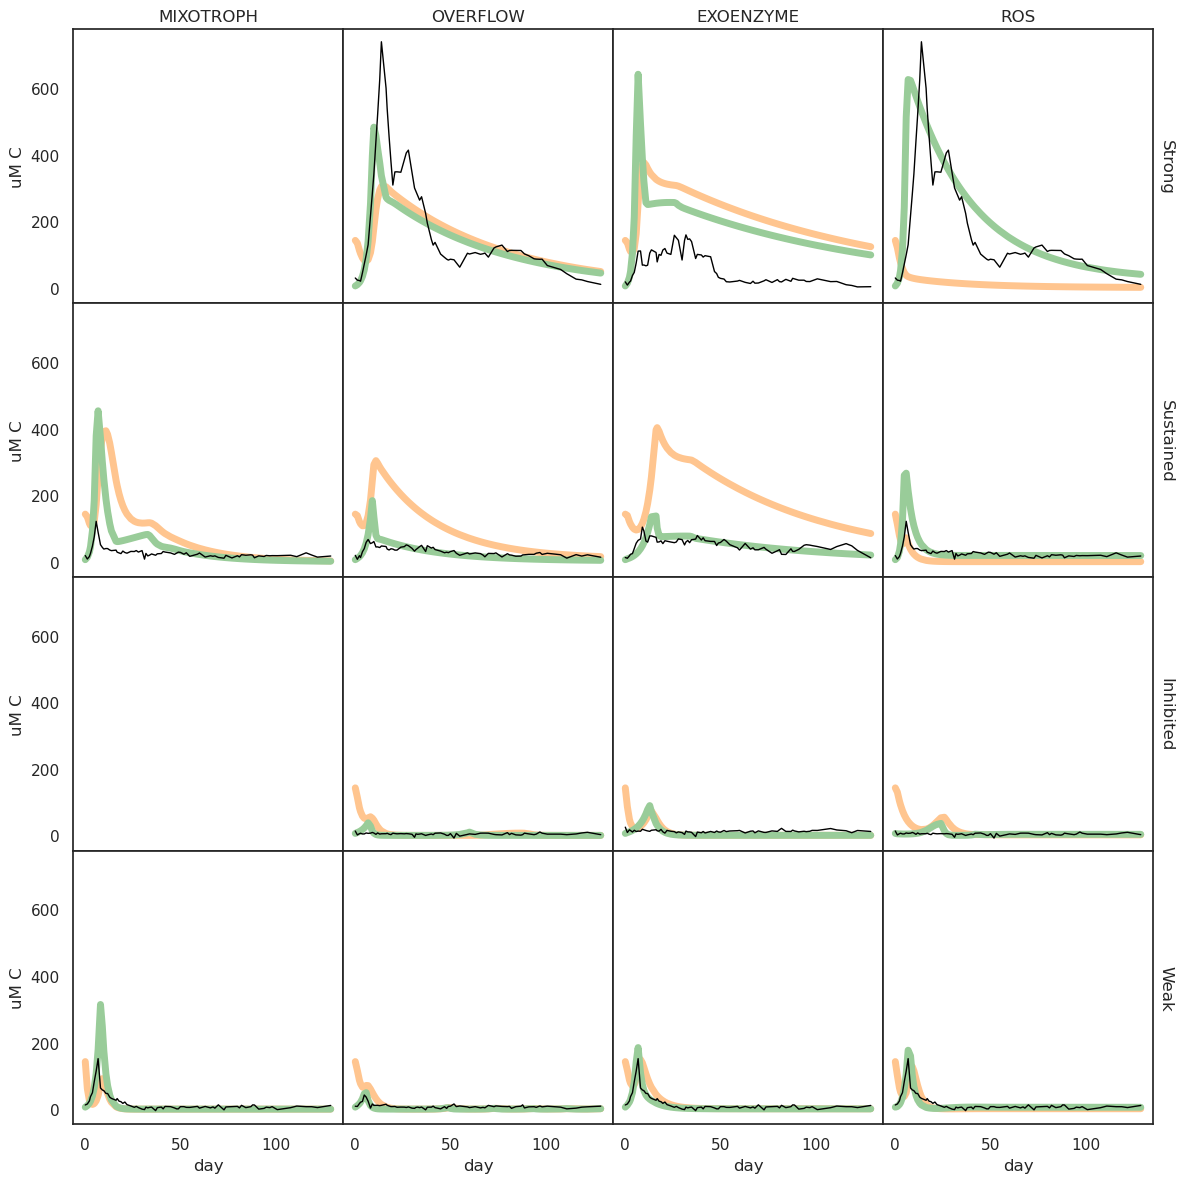

In [49]:
    g = sns.relplot(
        data=df.loc[df.model.isin(morder)],
        kind='line', 
        estimator=None, units='run_id',
        #hue='model', palette=mpalette, hue_order=morder,
        #hue='max_prob',palette='Greens',
        color=PCOLOR,
        x='day', y=f'Bptotal[C]', lw=5, #alpha=0.5,
        row='y_pred',  row_order=gorder[:4],
        col='model',  col_order=morder, 
        facet_kws=dict( margin_titles=True, despine=False),
        legend=False,
        hue_norm=(0.5,1.3),
        height=3, aspect=1,
    )
    plt.subplots_adjust(hspace=0, wspace=0)
    g.set(ylabel='C biomass (uM C)')
    g.set(ylabel='')
    g.set_titles(col_template='{col_name}', row_template='{row_name}')

    for (row_val,col_val), ax in g.axes_dict.items():        
            data=df.loc[
                df.y_pred.isin([row_val]) &
                df.model.isin([col_val]) 
            ]
            if data.shape[0]>0:
                sns.lineplot(
                    data=data,
                    estimator=None, units='run_id',
                    #hue='model', palette=mpalette, hue_order=morder,
                    #hue='max_prob', palette='Oranges',
                    color=HCOLOR,
                    x='day', y=f'Bhtotal[C]', lw=5,
                    #alpha=0.5,
                    legend=False,
                    hue_norm=(0.5,1.3),
                    
                    zorder=-1,
                    ax=ax,
                )
            ref_samples = set(data['Sample'].mode())
            
            if ref_samples:
                sns.lineplot(
                    data=refdf.loc[refdf.Sample.isin(ref_samples)],
                    estimator=None, units='Sample',
                    x='day', y=f'ref_Bp[C]', lw=1,
                    legend=False,
                    color='black',
                    #zorder=-1,
                    ax=ax,
                )
    g.set(ylabel='uM C')


Text(0.5, 0.98, 'Top Strong Simulations')

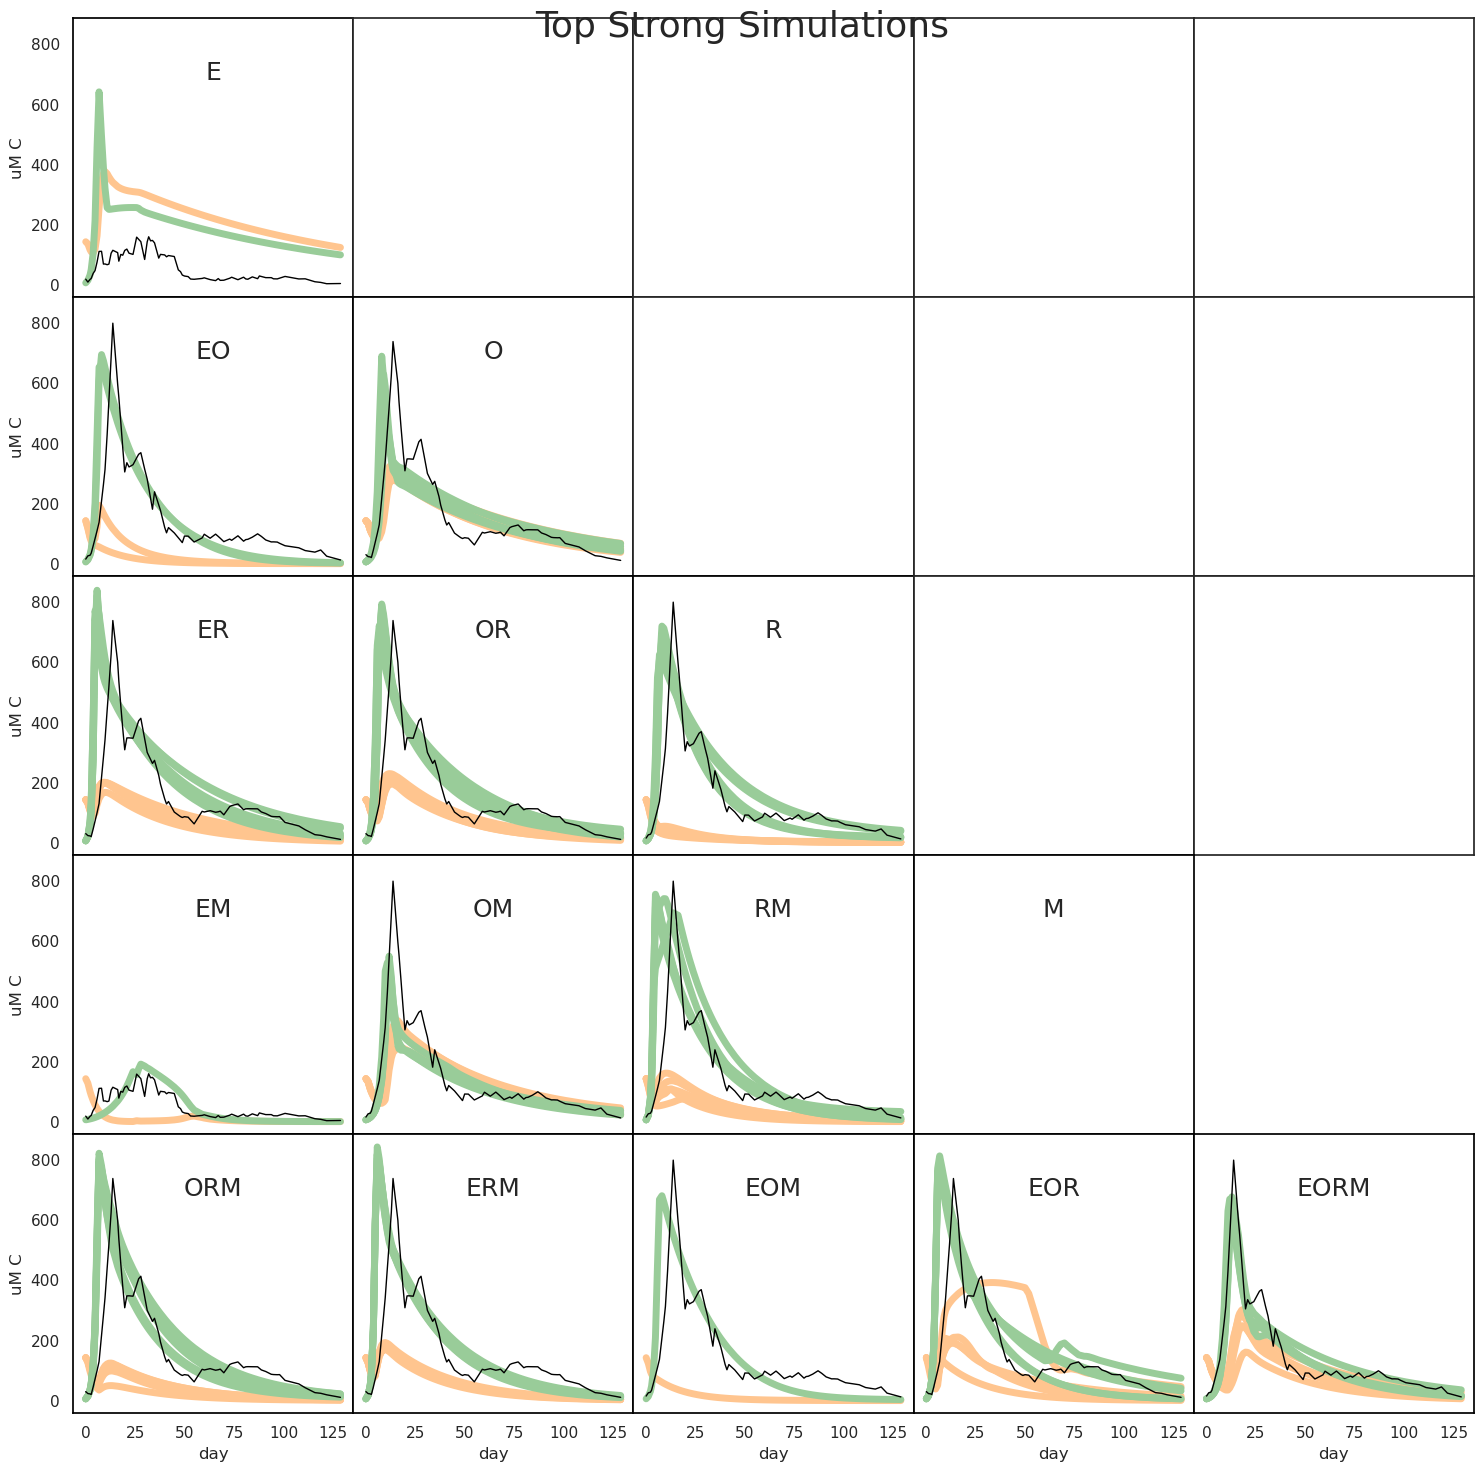

In [40]:
    y_pred = 'Strong'
    g = sns.relplot(
        data=df.loc[df.y_pred.isin([y_pred])],
        kind='line', 
        estimator=None, units='run_id',
        #hue='model', palette=mpalette, hue_order=morder,
        #hue='max_prob',palette='Greens',
        color=PCOLOR,
        x='day', y=f'Bptotal[C]', lw=5, #alpha=0.5,
        #row='y_pred',  row_order=gorder,
        col='MODEL', col_wrap=5, col_order=Mtriangle, #col_wrap=3,
        facet_kws=dict( margin_titles=True, despine=False),
        legend=False,
        hue_norm=(0.5,1.3),
        height=3, aspect=1,
    )
    plt.subplots_adjust(hspace=0, wspace=0)
    g.set(ylabel='C biomass (uM C)')
    g.set(ylabel='')
    g.set_titles(col_template='{col_name}', row_template='{row_name}')

    for col_val, ax in g.axes_dict.items():        
        if col_val == '':
            ax.remove()
        else:
            data=df.loc[
                df.y_pred.isin([y_pred]) &
                df.MODEL.isin([col_val]) 
            ]
            if data.shape[0]>0:
                sns.lineplot(
                    data=data,
                    estimator=None, units='run_id',
                    #hue='model', palette=mpalette, hue_order=morder,
                    #hue='max_prob', palette='Oranges',
                    color=HCOLOR,
                    x='day', y=f'Bhtotal[C]', lw=5,
                    #alpha=0.5,
                    legend=False,
                    hue_norm=(0.5,1.3),
                    
                    zorder=-1,
                    ax=ax,
                )
            ref_samples = set(data['Sample'].mode())
            
            if ref_samples:
                sns.lineplot(
                    data=refdf.loc[refdf.Sample.isin(ref_samples)],
                    estimator=None, units='Sample',
                    x='day', y=f'ref_Bp[C]', lw=1,
                    legend=False,
                    color='black',
                    #zorder=-1,
                    ax=ax,
                )
    for col_val, ax in g.axes_dict.items():        
        if col_val != '':
            for _, spine in ax.spines.items():
                spine.set_visible(True) # You have to first turn them on
                spine.set_color('black')
            ax.set_title(ax.get_title(),y=0.75, fontsize=18) #, pad=-14)            
            ax.grid(False)
    #g.set(yscale='log', ylim=(1e-1, 1000))
    #sns.despine(top=False, right=False, left=False, bottom=False)
    #g.set(ylim=(0, 150))
    g.set(ylabel='uM C')
    plt.suptitle(f'Top {y_pred} Simulations', fontsize=26)

Text(0.5, 0.98, 'Top Sustained Simulations')

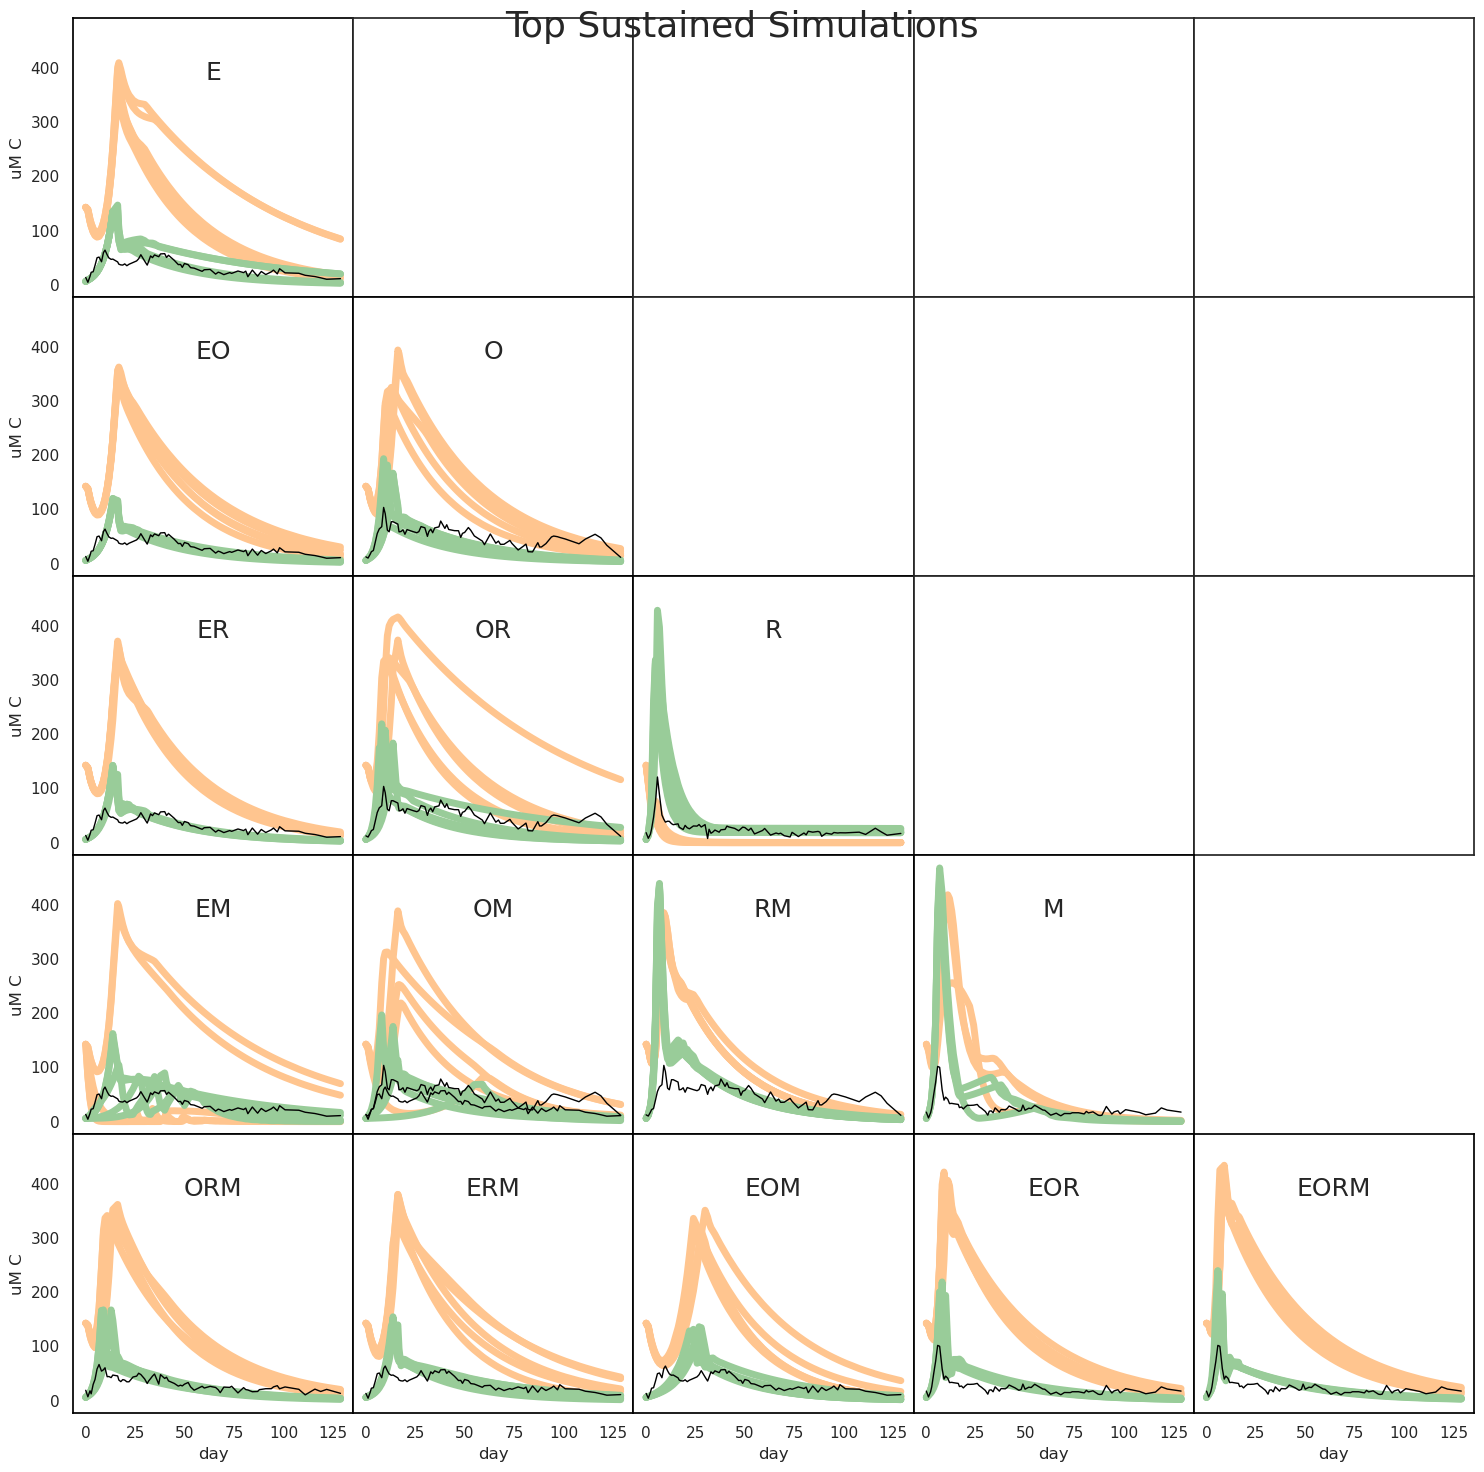

In [41]:
    y_pred = 'Sustained'
    g = sns.relplot(
        data=df.loc[df.y_pred.isin([y_pred])],
        kind='line', 
        estimator=None, units='run_id',
        #hue='model', palette=mpalette, hue_order=morder,
        #hue='max_prob',palette='Greens',
        color=PCOLOR,
        x='day', y=f'Bptotal[C]', lw=5, #alpha=0.5,
        #row='y_pred',  row_order=gorder,
        col='MODEL', col_wrap=5, col_order=Mtriangle, #col_wrap=3,
        facet_kws=dict( margin_titles=True, despine=False),
        legend=False,
        hue_norm=(0.5,1.3),
        height=3, aspect=1,
    )
    plt.subplots_adjust(hspace=0, wspace=0)
    g.set(ylabel='C biomass (uM C)')
    g.set(ylabel='')
    g.set_titles(col_template='{col_name}', row_template='{row_name}')

    for col_val, ax in g.axes_dict.items():        
        if col_val == '':
            ax.remove()
        else:
            data=df.loc[
                df.y_pred.isin([y_pred]) &
                df.MODEL.isin([col_val]) 
            ]
            if data.shape[0]>0:
                sns.lineplot(
                    data=data,
                    estimator=None, units='run_id',
                    #hue='model', palette=mpalette, hue_order=morder,
                    #hue='max_prob', palette='Oranges',
                    color=HCOLOR,
                    x='day', y=f'Bhtotal[C]', lw=5,
                    #alpha=0.5,
                    legend=False,
                    hue_norm=(0.5,1.3),
                    
                    zorder=-1,
                    ax=ax,
                )
            ref_samples = set(data['Sample'].mode())
            
            if ref_samples:
                sns.lineplot(
                    data=refdf.loc[refdf.Sample.isin(ref_samples)],
                    estimator=None, units='Sample',
                    x='day', y=f'ref_Bp[C]', lw=1,
                    legend=False,
                    color='black',
                    #zorder=-1,
                    ax=ax,
                )
    for col_val, ax in g.axes_dict.items():        
        if col_val != '':
            for _, spine in ax.spines.items():
                spine.set_visible(True) # You have to first turn them on
                spine.set_color('black')
            ax.set_title(ax.get_title(),y=0.75, fontsize=18) #, pad=-14)            
            ax.grid(False)
    #g.set(yscale='log', ylim=(1e-1, 1000))
    #sns.despine(top=False, right=False, left=False, bottom=False)
    #g.set(ylim=(0, 150))
    g.set(ylabel='uM C')
    plt.suptitle(f'Top {y_pred} Simulations', fontsize=26)

Text(0.5, 0.98, 'Top Inhibited Simulations')

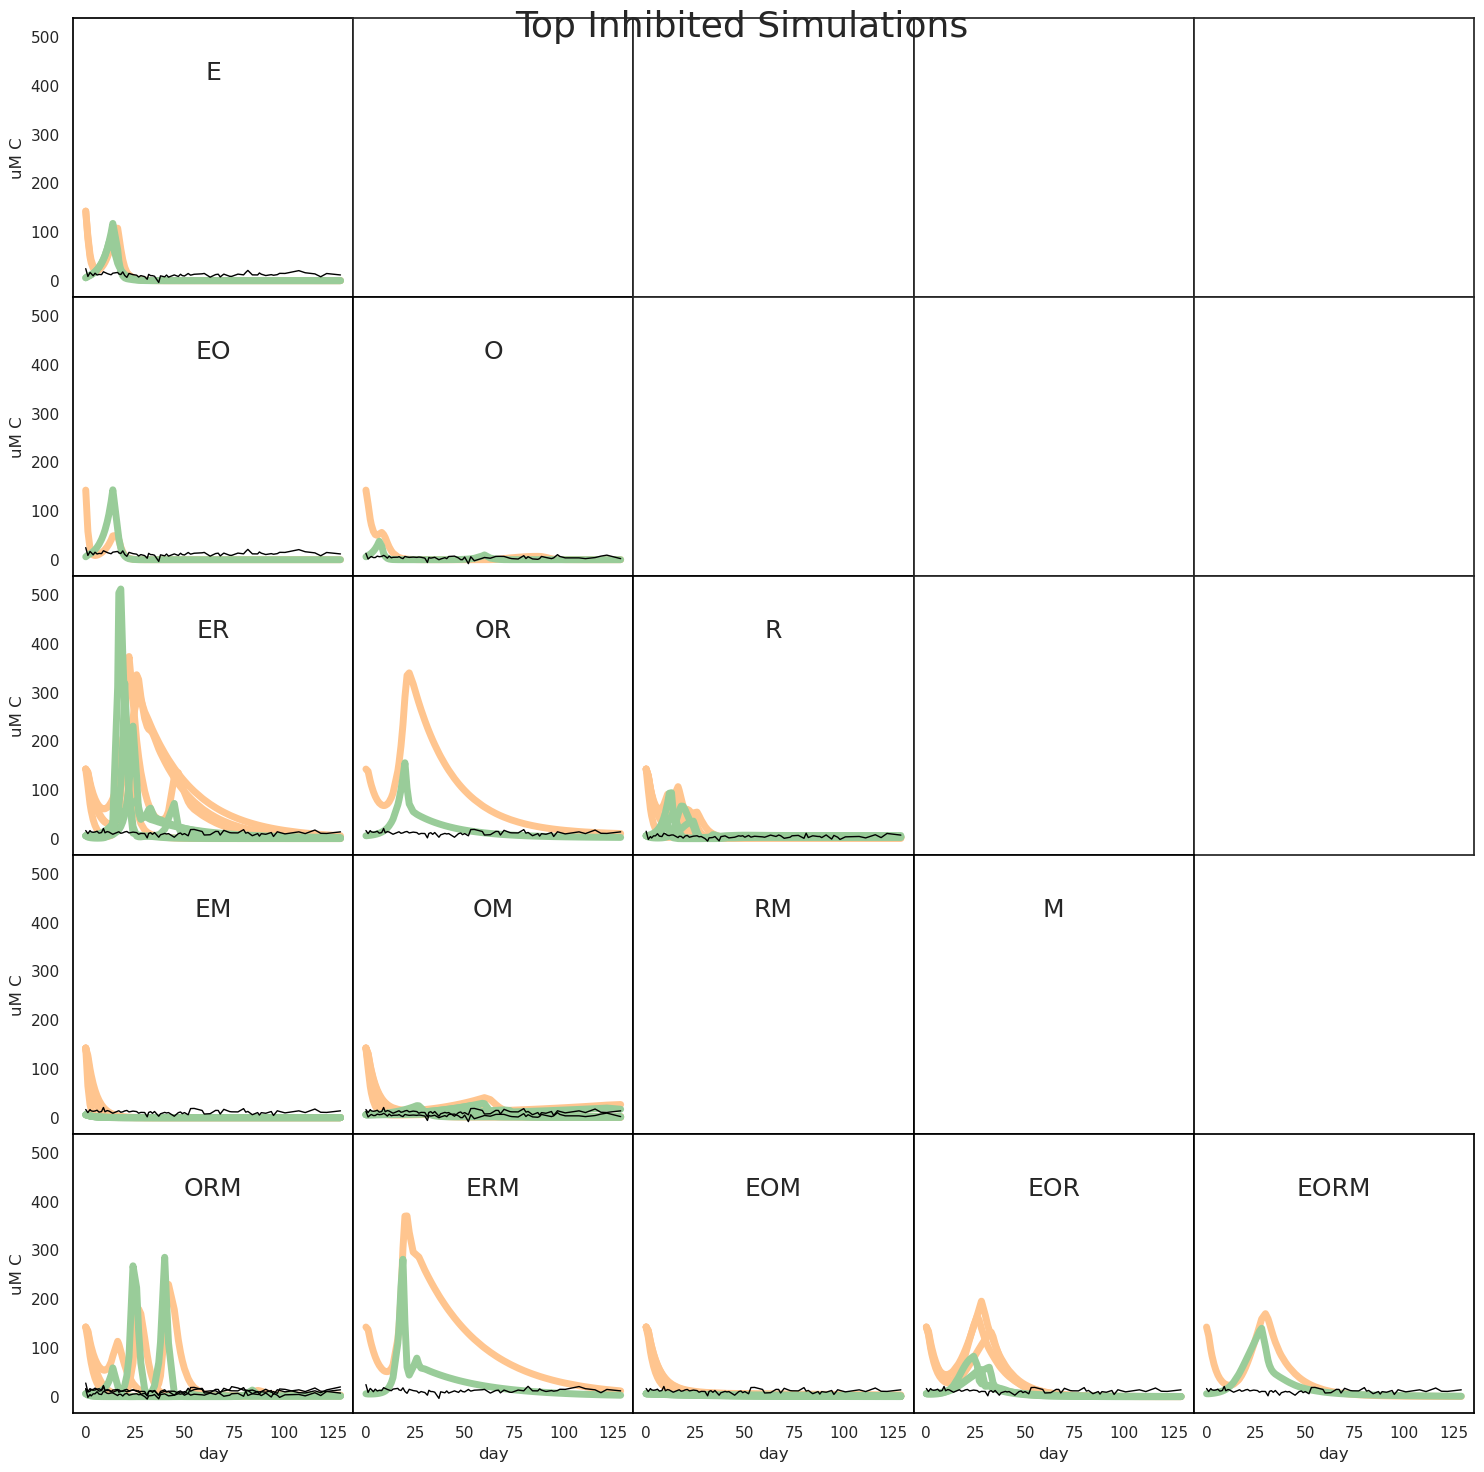

In [42]:
    y_pred = 'Inhibited'
    g = sns.relplot(
        data=df.loc[df.y_pred.isin([y_pred])],
        kind='line', 
        estimator=None, units='run_id',
        #hue='model', palette=mpalette, hue_order=morder,
        #hue='max_prob',palette='Greens',
        color=PCOLOR,
        x='day', y=f'Bptotal[C]', lw=5, #alpha=0.5,
        #row='y_pred',  row_order=gorder,
        col='MODEL', col_wrap=5, col_order=Mtriangle, #col_wrap=3,
        facet_kws=dict( margin_titles=True, despine=False),
        legend=False,
        hue_norm=(0.5,1.3),
        height=3, aspect=1,
    )
    plt.subplots_adjust(hspace=0, wspace=0)
    g.set(ylabel='C biomass (uM C)')
    g.set(ylabel='')
    g.set_titles(col_template='{col_name}', row_template='{row_name}')

    for col_val, ax in g.axes_dict.items():        
        if col_val == '':
            ax.remove()
        else:
            data=df.loc[
                df.y_pred.isin([y_pred]) &
                df.MODEL.isin([col_val]) 
            ]
            if data.shape[0]>0:
                sns.lineplot(
                    data=data,
                    estimator=None, units='run_id',
                    #hue='model', palette=mpalette, hue_order=morder,
                    #hue='max_prob', palette='Oranges',
                    color=HCOLOR,
                    x='day', y=f'Bhtotal[C]', lw=5,
                    #alpha=0.5,
                    legend=False,
                    hue_norm=(0.5,1.3),
                    
                    zorder=-1,
                    ax=ax,
                )
            ref_samples = set(data['Sample'].mode())
            
            if ref_samples:
                sns.lineplot(
                    data=refdf.loc[refdf.Sample.isin(ref_samples)],
                    estimator=None, units='Sample',
                    x='day', y=f'ref_Bp[C]', lw=1,
                    legend=False,
                    color='black',
                    #zorder=-1,
                    ax=ax,
                )
    for col_val, ax in g.axes_dict.items():        
        if col_val != '':
            for _, spine in ax.spines.items():
                spine.set_visible(True) # You have to first turn them on
                spine.set_color('black')
            ax.set_title(ax.get_title(),y=0.75, fontsize=18) #, pad=-14)            
            ax.grid(False)
    #g.set(yscale='log', ylim=(1e-1, 1000))
    #sns.despine(top=False, right=False, left=False, bottom=False)
    #g.set(ylim=(0, 150))
    g.set(ylabel='uM C')
    plt.suptitle(f'Top {y_pred} Simulations', fontsize=26)